In [353]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Arrow, FancyArrowPatch
import numpy as np
from matplotlib import pyplot as plt
from long_covid import styling
from long_covid.colors import flatuicolors
import datetime

In [357]:
tests = pd.read_feather('../data/01_raw/tests.feather')
tests[tests.test_result == 'positive'].iloc[1007]

In [354]:
df = pd.read_feather('../data/02_processed/vitals_processed.feather')

In [416]:
#276043 is also a good choice!

df = vitals[vitals.userid == 384099]
df.sort_values(by='date', inplace=True)
df = df[df.vitalid == 9]
df = df[(df.daily_mean < 30000) & (df.raw_value < 20000)]
df['factor'] = np.cos((pd.to_datetime(df.date) - datetime.datetime(2020, 1, 1)).dt.days / 365 * 2 * np.pi - np.pi + (1 * np.random.random(len(df.date)) - 0.5))

/var/folders/cm/6ltwrgb55_l43f5w6rzn62zc0000gn/T/ipykernel_5598/2598743943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='date', inplace=True)


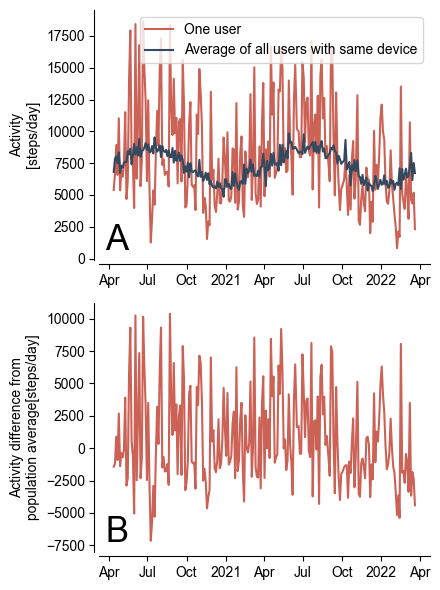

In [437]:
f, axarr = plt.subplots(2, 1, figsize=(4.5, 6))

axarr = axarr.flatten()
ax1, ax2,  = axarr
ax1.plot(df.date[::3], df.raw_value[::3] + 1000 * df.factor[::3], label='One user', c=flatuicolors.pomegranate, ls='-', alpha=0.8)
ax1.plot(df.date[::3], df.daily_mean[::3] + 1000 * df.factor[::3], label='Average of all users with same device', c=flatuicolors.wetasphalt)
ax2.plot(df.date[::3], df.value[::3], label='Daily deviation from population average', c=flatuicolors.pomegranate, alpha=0.8)

ax1.set_ylabel('Activity\n[steps/day]')
ax2.set_ylabel('Activity difference from\npopulation average[steps/day]')
ax1.legend(loc='upper right')

for ax, label in zip(axarr, ("A", "B")):
    styling.hide_and_move_axis(ax)
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    ax.text(x0 + (x1 - x0) * 0.02, y0 + (y1 - y0) * 0.04, label, size=25)

plt.tight_layout()
plt.savefig('../output/si_figure7_user_anomaly_computation.jpg')

(0.0, 1.0, 0.0, 1.0)

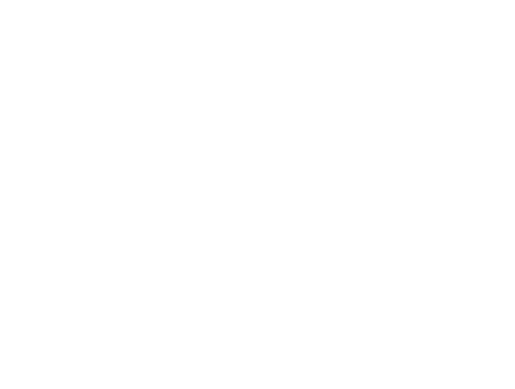

In [370]:
circle = Circle((0.51, 0.74), 0.02, facecolor='w', edgecolor='k', linewidth=2)
f.add_artist(circle)

x = [0.48, 0.49]
y = [0.74, 0.74]
line = Line2D(x, y, lw=2., color='k', alpha=1)
f.add_artist(line)

x = [0.53, 0.54]
y = [0.74, 0.74]
line = Line2D(x, y, lw=2., color='k', alpha=1)
f.add_artist(line)

x = [0.51, 0.51]
y = [0.72, 0.46]
line = Line2D(x, y, lw=2., color='k', alpha=1)

arrow = Arrow(0.51, 0.72, 0, -0.3, width=0.01, color='k')
arrow = FancyArrowPatch((0.51, 0.723), (0.51, 0.44), linewidth=2, arrowstyle='->', mutation_scale=30)
f.add_artist(arrow)

f.text(.5025, 0.725, '-', size=30)

plt.axis('off')